# **Dimension reduction:**
**PCA on overall dataset, find principal components and use these in classification method**

**If one column has high # of missing values, drop**

**Or only drop chemicals with same missingness as PFAS group (this way we don’t drop too much)**

**Normalize before PCA - mean 0 var 1**

**Compare coefficients bc they are all linear combinations**

**Take the coeff in the PCA, take the abs val of the coeff and rank the chemicals by what is getting the most weight**


# setup

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [43]:
!pip install xport

In [44]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


#Creating LC comment files for CUSEZN_H (Copper, Selenium & Zinc - Serum) where everything is detect for everyone

In [45]:
df['CUSEZN_H'].head()

,SEQN,WTSA2YR,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR
0,73560.0,183653.604036,122.0,19.15,112.2,1.42,79.9,12.22,76.0
1,73564.0,194847.483347,128.0,20.10,131.2,1.67,81.0,12.39,242.0
2,73567.0,100284.090673,128.6,20.19,114.0,1.45,73.2,11.20,215.0
3,73583.0,163017.304491,NaN,NaN,NaN,NaN,NaN,NaN,151.0
4,73585.0,55880.049721,86.1,13.52,114.5,1.45,89.8,13.74,100.0


In [46]:
df['CUSEZN_H']['LBDSCULC']=0
df['CUSEZN_H']['LBDSSELC']=0
df['CUSEZN_H']['LBDSZNLC']=0
df['CUSEZN_H']['URDUCRLC']=0

#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [47]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [48]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [49]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDSCULC': 100.0,
 'LBDSSELC': 100.0,
 'LBDSZNLC': 100.0,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81

In [50]:
len(d_p)

135

In [51]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [52]:
type(d_p)
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [53]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 30 or val >= 70)}

In [54]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [55]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [56]:
len(binary_list)

17

In [57]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDSCULC,LBDSSELC,LBDSZNLC,URDUCRLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'URDDEALC', 'URDDHDLC', 'LBDEOALC', 'LBDPFLLC', 'LBDSCULC', 'LBDSSELC',
       'LBDSZNLC', 'URDUCRLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=136)

In [59]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

# First, let's look at overlap with the PFAS Group

In [60]:
#NAIMAN'S ORIGINAL CODE
# For each pair of data frames determine the number of entries in the intersection.
# wanted to know where i have files with multiple chemicals for one person
#
ndf=len(fnames)
M=np.zeros((ndf,ndf))
for i in range(ndf):
    for j in range(ndf):
        fnamei=fnames[i]
        fnamej=fnames[j]
        dfi=df[fnamei]
        dfj=df[fnamej]
        SEQNi=set(dfi.SEQN)
        SEQNj=set(dfj.SEQN)
        M[i,j]=len(SEQNi.intersection(SEQNj))
ndf

17

In [61]:
#NAIMAN'S ORIGINAL CODE
# make list of all SEQNs in all the datasets, find that there is 9422 people
#
ALLSEQN=set()
for i in range(ndf):
    SEQN=set(df[fnames[i]].SEQN.astype(int))
    ALLSEQN=ALLSEQN.union(SEQN)
print(len(ALLSEQN))
#
# for each SEQN count number of data frames in which it appears
#
ALLSEQN=list(ALLSEQN)
print(len(ALLSEQN))
#
# index for each sequence number
#
index_of_sequence_number={}
ctr=0
for seqn in ALLSEQN:
    index_of_sequence_number[seqn]=ctr
    ctr+=1

9422
9422


In [62]:
# make list of all SEQNs in PFAS group
PFAS_SEQN=[]
for i in df['PFAS_H']['SEQN']:
  PFAS_SEQN.append(i)
len(PFAS_SEQN)

2339

In [63]:
#counting how many people show up in PFAS and other groups
count=0
for i in ALLSEQN:
  if i in PFAS_SEQN:
    count +=1
count

2339

In [64]:
#seeing which chemical groups have the same people tested as in PFAS
shared_w_PFAS=[]
for i in fnames:
  SEQN = df[i]['SEQN']
  intersection_set = set.intersection(set(SEQN), set(PFAS_SEQN))
  intersection_list = list(intersection_set)
  if len(intersection_list) > 0:
      shared_w_PFAS.append(i)
len(shared_w_PFAS)

7

In [65]:
#removing PFAS itself form this list
shared_w_PFAS.remove('PFAS_H')
shared_w_PFAS

['VOCWB_H', 'PHTHTE_H', 'EPHPP_H', 'IHGEM_H', 'PBCD_H', 'FLDEP_H']

# master dataframe

In [186]:
#making one master dataframe of everything that will be used to model PFAS_H chemicals
df_predict=pd.DataFrame(data=df['PFAS_H'])
#removing records where there are missing values in the PFAS file
df_predict=df_predict.dropna()
#the number of rows printed here should match the number of rows in the dataframe
print(df_predict.shape)
for i in shared_w_PFAS:
  df_predict=pd.merge(df_predict,pd.DataFrame(data=df[i]),on='SEQN',how='left')
df_predict

(2168, 18)


,SEQN,WTSB2YR_x,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,LBDPFL,LBDPFLLC
0,73568.0,270133.488619,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73571.0,138554.659645,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73574.0,46186.186645,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73576.0,37460.999852,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,0.0
4,73577.0,128174.418941,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,82946.684281,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,83712.0,114681.392602,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,...,1.0,1.0,169.46,2.15,0.0,5.91,107.56,0.0,NaN,NaN
2165,83713.0,49551.258249,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2166,83717.0,29856.202622,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
#checking that everything made it into the dataframe
count= 18
for i in shared_w_PFAS:
  j = pd.DataFrame(data=df[i])
  m = j.shape[1]-1
  count += m
count

177

#which of the chemicals do we have that we will treat as binary in our model?
#removing the continuous version of it

In [188]:
intersection_set = set.intersection(set(df_predict.columns), set(binary_df.columns))
intersection_list = list(intersection_set)
#removing this one because it is one of very very few chemicals that don't follow the naming convention
intersection_list.remove('URXTLC')

In [189]:
print(len(intersection_list))

73


In [190]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in intersection_list:
  if i in df["PFAS_H"].columns:
    intersection_list.remove(i)
len(intersection_list)

73

In [191]:
intersection_list

['LBD2DFLC',
 'LBDVTOLC',
 'LBDV06LC',
 'LBDVTELC',
 'LBDVMELC',
 'LBDVEBLC',
 'URDDCBLC',
 'LBDBGELC',
 'LBDPFLLC',
 'LBDVDBLC',
 'LBDVNBLC',
 'URDBPHLC',
 'LBDVFNLC',
 'LBD4CELC',
 'LBDVOXLC',
 'URDBP3LC',
 'URDMOHLC',
 'URDMC1LC',
 'LBDBCDLC',
 'LBDV1DLC',
 'LBDVHTLC',
 'URDECPLC',
 'LBDVIPLC',
 'LBDVBMLC',
 'LBDVDELC',
 'URDMEPLC',
 'LBDVC6LC',
 'LBDBPBLC',
 'URDBPSLC',
 'URDMCHLC',
 'URDPPBLC',
 'LBDVCTLC',
 'URDCNPLC',
 'URDEPBLC',
 'LBDVCFLC',
 'URDMNPLC',
 'LBDVTPLC',
 'LBDTHGLC',
 'URDCOPLC',
 'URDMPBLC',
 'URDTLCLC',
 'URDBUPLC',
 'LBDVVBLC',
 'LBDVTCLC',
 'LBDVBZLC',
 'URDBPFLC',
 'URDMBPLC',
 'LBDVMCLC',
 'LBDVMPLC',
 'LBDBGMLC',
 'URDTRSLC',
 'URDMIBLC',
 'LBDVFTLC',
 'LBDVDXLC',
 'LBDVECLC',
 'LBDV3BLC',
 'LBDIHGLC',
 'LBDVCBLC',
 'LBDVEALC',
 'LBDVCMLC',
 'URDMHPLC',
 'LBDVBFLC',
 'LBDBSELC',
 'LBDVXYLC',
 'LBDV07LC',
 'LBDV4CLC',
 'URDMZPLC',
 'LBDV2ALC',
 'LBDV08LC',
 'LBDBMNLC',
 'URD14DLC',
 'URDMHHLC',
 'LBDVEELC']

In [192]:
#percentage of what is binary in df
len(intersection_list)/len(df_predict)*100

3.367158671586716

In [193]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]

In [194]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

73

In [195]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in cols_to_drop:
  if i in df["PFAS_H"].columns:
    cols_to_drop.remove(i)

In [196]:
len(cols_to_drop)
cols_to_drop

['LBX2DF',
 'LBXVTO',
 'LBXV06',
 'LBXVTE',
 'LBXVME',
 'LBXVEB',
 'URXDCB',
 'LBXBGE',
 'LBXPFL',
 'LBXVDB',
 'LBXVNB',
 'URXBPH',
 'LBXVFN',
 'LBX4CE',
 'LBXVOX',
 'URXBP3',
 'URXMOH',
 'URXMC1',
 'LBXBCD',
 'LBXV1D',
 'LBXVHT',
 'URXECP',
 'LBXVIP',
 'LBXVBM',
 'LBXVDE',
 'URXMEP',
 'LBXVC6',
 'LBXBPB',
 'URXBPS',
 'URXMCH',
 'URXPPB',
 'LBXVCT',
 'URXCNP',
 'URXEPB',
 'LBXVCF',
 'URXMNP',
 'LBXVTP',
 'LBXTHG',
 'URXCOP',
 'URXMPB',
 'URXTLC',
 'URXBUP',
 'LBXVVB',
 'LBXVTC',
 'LBXVBZ',
 'URXBPF',
 'URXMBP',
 'LBXVMC',
 'LBXVMP',
 'LBXBGM',
 'URXTRS',
 'URXMIB',
 'LBXVFT',
 'LBXVDX',
 'LBXVEC',
 'LBXV3B',
 'LBXIHG',
 'LBXVCB',
 'LBXVEA',
 'LBXVCM',
 'URXMHP',
 'LBXVBF',
 'LBXBSE',
 'LBXVXY',
 'LBXV07',
 'LBXV4C',
 'URXMZP',
 'LBXV2A',
 'LBXV08',
 'LBXBMN',
 'URX14D',
 'URXMHH',
 'LBXVEE']

In [197]:
#there were a few with unique naming conventions to change
i=['LBXV08','LBXVHT','LBXVIP','LBXVMP','URXMCH','LBXVFT','LBXPFL','LBXV07','LBXVEE']
for j in i:
  cols_to_drop.remove(j)
i=['LBXV08N','LBXVTHF','LBXVIPB','LBXVMCP','URXMHNC','LBXVTFT','LBDPFL','LBXV07N','LBXVDEE']
for j in i:
  cols_to_drop.append(j)

In [198]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_predict=df_predict.drop(columns=cols_to_drop)

# removing subsample weights


In [199]:
for i in df_predict.columns:
  if i.startswith('WT'):
    df_predict = df_predict.drop(columns=i)

# No Imputation, drop na values strategically
**If one column has high # of missing values, drop**

Or only drop chemicals with same missingness as PFAS group (this way we don’t drop too much)

In [213]:
display(df_predict)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.89,0.0,1.0,1.0,2.15,0.0,107.56,0.0,NaN
2165,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2166,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
# empty dictionary which will be filled with column name as key 
# and number of missing values in said column as value
nan_dict={}
for col in df_predict.columns:
  nan_dict[col]=(df_predict[col].isna().sum())/len(df_predict)*100


In [215]:
display(nan_dict)

{'LBD2DFLC': 74.81549815498155,
 'LBD4CELC': 75.55350553505535,
 'LBDBCDLC': 74.21586715867159,
 'LBDBCDSI': 74.21586715867159,
 'LBDBGELC': 74.21586715867159,
 'LBDBGMLC': 74.21586715867159,
 'LBDBMNLC': 74.21586715867159,
 'LBDBMNSI': 74.21586715867159,
 'LBDBPBLC': 74.21586715867159,
 'LBDBPBSI': 74.21586715867159,
 'LBDBSELC': 74.21586715867159,
 'LBDBSESI': 74.21586715867159,
 'LBDIHGLC': 74.21586715867159,
 'LBDIHGSI': 74.21586715867159,
 'LBDMPAHL': 0.0,
 'LBDPFBSL': 0.0,
 'LBDPFDEL': 0.0,
 'LBDPFDOL': 0.0,
 'LBDPFHPL': 0.0,
 'LBDPFHSL': 0.0,
 'LBDPFLLC': 81.45756457564576,
 'LBDPFNAL': 0.0,
 'LBDPFUAL': 0.0,
 'LBDTHGLC': 74.21586715867159,
 'LBDTHGSI': 74.21586715867159,
 'LBDV06LC': 76.89114391143912,
 'LBDV07LC': 75.96863468634686,
 'LBDV08LC': 75.41512915129151,
 'LBDV1DLC': 75.27675276752768,
 'LBDV2ALC': 74.81549815498155,
 'LBDV3BLC': 75.27675276752768,
 'LBDV4CLC': 76.4760147601476,
 'LBDVBFLC': 75.0461254612546,
 'LBDVBMLC': 75.18450184501845,
 'LBDVBZLC': 75.8763837638

In [216]:
nan_dict_sorted=sorted(nan_dict.items(), key=lambda item: item[1], reverse=True)

In [217]:
display(nan_dict_sorted)

[('LBDPFLLC', 81.45756457564576),
 ('LBDV06LC', 76.89114391143912),
 ('LBDVMELC', 76.52214022140221),
 ('LBDV4CLC', 76.4760147601476),
 ('LBDVC6LC', 76.42988929889299),
 ('LBDVEELC', 76.24538745387454),
 ('LBDVHTLC', 76.19926199261992),
 ('LBDVTOLC', 76.15313653136532),
 ('LBDV07LC', 75.96863468634686),
 ('LBDVEBLC', 75.92250922509226),
 ('LBDVBZLC', 75.87638376383764),
 ('LBD4CELC', 75.55350553505535),
 ('LBDVTCLC', 75.50738007380073),
 ('LBDVDXLC', 75.46125461254613),
 ('LBDV08LC', 75.41512915129151),
 ('LBDVCFLC', 75.36900369003689),
 ('LBDVMPLC', 75.36900369003689),
 ('LBDVDBLC', 75.32287822878229),
 ('LBDVEALC', 75.32287822878229),
 ('LBDV1DLC', 75.27675276752768),
 ('LBDV3BLC', 75.27675276752768),
 ('LBDVMCLC', 75.23062730627306),
 ('LBDVBMLC', 75.18450184501845),
 ('LBDVNBLC', 75.13837638376384),
 ('LBDVTPLC', 75.13837638376384),
 ('LBDVXYLC', 75.13837638376384),
 ('LBDVBFLC', 75.0461254612546),
 ('LBDVVBLC', 75.0461254612546),
 ('LBDVCMLC', 74.90774907749078),
 ('LBDVCBLC', 74.

let's do the cut off at 74% 

In [218]:
for key in nan_dict.keys():
  if nan_dict[key]>74:
    df_predict=df_predict.drop(columns=key)

In [219]:
display(df_predict)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,URDBPSLC,URDTLCLC,URDTRSLC,URDBUPLC,URDEPBLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URXUCR_y
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,31.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,177.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,173.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,166.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,62.0
2164,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,85.0
2165,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,80.0
2166,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,125.0


In [220]:
df_predict=df_predict.dropna()

In [221]:
display(df_predict)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,URDBPSLC,URDTLCLC,URDTRSLC,URDBUPLC,URDEPBLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URXUCR_y
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,31.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,177.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,173.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,166.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,62.0
2164,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,85.0
2165,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,80.0
2166,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,125.0


#PCA preprocessing
**Normalize before PCA - mean 0 var 1**

In [184]:
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_predict_standardized = z_score(df_predict)

In [185]:
display(df_predict_standardized)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,URDBPSLC,URDTLCLC,URDTRSLC,URDBUPLC,URDEPBLC,URDMPBLC,URDPPBLC,URD14DLC,URDDCBLC,URXUCR_y
0,-1.736628,-0.094714,-0.51119,0.475523,-0.099929,0.052842,-1.117297,-0.066057,0.084335,-0.223090,...,3.033545,-1.198646,-0.557814,0.689279,-1.012561,-0.078474,-0.109135,8.081644,-0.224603,-1.206687
1,-1.735613,-0.013075,-0.51119,0.023633,-0.099929,0.052842,-1.117297,-0.066057,0.084335,-0.223090,...,-0.329492,-1.198646,-0.557814,0.689279,0.987129,-0.078474,-0.109135,-0.123679,-0.224603,0.553327
2,-1.734598,-0.176353,-0.51119,-0.789768,-0.099929,-0.389496,0.894596,-0.066057,0.084335,-0.223090,...,-0.329492,0.833882,-0.557814,0.689279,-1.012561,-0.078474,-0.109135,-0.123679,-0.224603,0.505107
3,-1.733921,-0.094714,-0.51119,2.554214,-0.099929,-0.389496,0.894596,-0.066057,0.084335,2.068333,...,-0.329492,-1.198646,-0.557814,0.689279,-1.012561,-0.078474,-0.109135,-0.123679,-0.224603,0.420723
4,-1.733583,-0.176353,-0.51119,-0.337878,-0.099929,-0.389496,0.894596,-0.066057,0.084335,-0.223090,...,-0.329492,0.833882,-0.557814,-1.450107,-1.012561,-0.078474,-0.109135,-0.123679,-0.224603,0.722095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,1.695848,-0.200844,1.95530,-0.609012,-0.099929,0.052842,-1.117297,-0.066057,0.084335,-0.223090,...,-0.329492,0.833882,-0.557814,0.689279,0.987129,-0.078474,-0.109135,-0.123679,-0.224603,-0.832986
2164,1.696187,-0.094714,-0.51119,0.565901,-0.099929,-0.389496,0.894596,-0.066057,0.084335,-0.223090,...,-0.329492,0.833882,1.791867,0.689279,0.987129,-0.078474,-0.109135,-0.123679,-0.224603,-0.555723
2165,1.696525,0.476759,-0.51119,-0.383067,-0.099929,-0.389496,0.894596,-0.066057,0.084335,-0.223090,...,-0.329492,0.833882,1.791867,0.689279,0.987129,-0.078474,-0.109135,-0.123679,-0.224603,-0.615997
2166,1.697879,-0.094714,-0.51119,-0.247500,-0.099929,-0.389496,0.894596,-0.066057,0.084335,-0.223090,...,3.033545,-1.198646,1.791867,0.689279,0.987129,-0.078474,-0.109135,-0.123679,-0.224603,-0.073527


# **@anna: everything below this sentence has not been updated since last week**

#Splitting the data
We are trying to predict detect or not of Perfluorodecanoic acid (ug/L)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)
#removing the related chemical, and detection comment code (no cheating!!)
X_train=train.drop(columns=['LBDPFDEL','LBXPFDE'])
X_test=test.drop(columns=['LBDPFDEL','LBXPFDE'])
Y_train=train['LBDPFDEL']
Y_test=test['LBDPFDEL']

In [ ]:
include=list(X_train.columns)

#ROC and thresholds

In [ ]:
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


#ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  prediction[:,1])
auc = metrics.roc_auc_score(Y_test,  prediction[:,1])
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

NameError: ignored

interpretting ROC : classifiers that give curves closer to the top left corner indicate a better performance. 

as a baseline, note that random classifiers are expected to produce a curve from points on the diagonal.

AUC of ~ 0.74 implies moderate accuracy 

In [ ]:
print(fpr,tpr)
print(tpr * (1-fpr))
print(threshold)

NameError: ignored

In [ ]:
#threshold
np.sqrt(tpr * (1-fpr))

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

#PCA–only continuous

In [ ]:
PCA_df=df_predict.dropna()

In [ ]:
display(PCA_df)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBPBLC,LBDBCDSI,LBDBCDLC,LBDTHGSI,LBDTHGLC,LBDBSESI,LBDBSELC,LBDBMNSI,LBDBMNLC,LBDPFLLC
76,73892.0,0.10,0.0,0.4,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,2.05,0.0,6.2,0.0,2.56,0.0,198.93,0.0,0.0
94,73968.0,0.20,0.0,3.1,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,1.42,0.0,4.0,0.0,2.50,0.0,148.51,0.0,0.0
111,74031.0,0.07,1.0,0.9,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.16,0.0,1.9,0.0,2.41,0.0,151.61,0.0,0.0
152,74233.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.51,0.0,1.6,0.0,2.39,0.0,453.36,0.0,0.0
197,74507.0,0.20,0.0,0.4,0.0,0.10,0.0,0.07,1.0,0.20,...,0.0,1.25,0.0,1.7,0.0,2.64,0.0,236.60,0.0,0.0
235,74682.0,0.10,0.0,3.5,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.25,0.0,1.7,0.0,2.48,0.0,139.78,0.0,1.0
239,74701.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,0.62,1.0,2.5,0.0,2.43,0.0,281.74,0.0,1.0
274,74886.0,0.20,0.0,1.0,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.62,1.0,3.5,0.0,2.69,0.0,167.44,0.0,0.0
387,75405.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.51,0.0,2.5,0.0,2.75,0.0,184.73,0.0,0.0
413,75570.0,0.07,1.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.62,1.0,1.7,0.0,2.56,0.0,287.20,0.0,0.0


In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = PCA_df.columns[PCA_df.isin([0,1]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in PCA_df.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    PCA_df[col] = np.log(PCA_df[col])
  else:
    PCA_df = PCA_df.drop(columns=col)


In [ ]:
display(PCA_df)

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO,URXUCR_x,URXUCR_y,LBDIHGSI,LBDBPBSI,LBDBCDSI,LBDTHGSI,LBDBSESI,LBDBMNSI
76,-2.302585,-0.916291,-1.609438,-2.65926,-2.659260,-0.510826,-2.659260,-1.609438,5.332719,5.332719,-0.051293,-3.540459,0.717840,1.824549,0.940007,5.292953
94,-1.609438,1.131402,-1.609438,-2.65926,-2.659260,-0.510826,-2.302585,-2.659260,5.762051,5.762051,-0.051293,-4.199705,0.350657,1.386294,0.916291,5.000652
111,-2.659260,-0.105361,-2.659260,-2.65926,-2.659260,-1.609438,-2.659260,-2.302585,5.505332,5.505332,-0.051293,-4.017384,0.148420,0.641854,0.879627,5.021311
152,-2.659260,-0.223144,-2.659260,-2.65926,-2.659260,-0.693147,-2.659260,-2.659260,4.304065,4.304065,-0.051293,-3.963316,0.412110,0.470004,0.871293,6.116687
197,-1.609438,-0.916291,-2.302585,-2.65926,-1.609438,-0.916291,-2.659260,-2.659260,5.746203,5.746203,-0.051293,-3.101093,0.223144,0.530628,0.970779,5.466371
235,-2.302585,1.252763,-2.659260,-2.65926,-2.659260,0.336472,-2.302585,-2.659260,4.584967,4.584967,-0.051293,-4.199705,0.223144,0.530628,0.908259,4.940070
239,-2.659260,-0.510826,-1.609438,-2.65926,-2.659260,-1.203973,-2.659260,-1.609438,5.099866,5.099866,0.530628,-4.268698,-0.478036,0.916291,0.887891,5.640985
274,-1.609438,0.000000,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260,5.777652,5.777652,0.832909,-4.074542,-0.478036,1.252763,0.989541,5.120625
387,-2.659260,-0.693147,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260,5.707110,5.707110,-0.051293,-4.199705,0.412110,0.916291,1.011601,5.218895
413,-2.659260,0.095310,-2.659260,-2.65926,-2.659260,-0.693147,-2.659260,-2.659260,4.762174,4.762174,-0.051293,-3.575551,-0.478036,0.530628,0.940007,5.660179


In [ ]:
# eigen decomposition on covariance matrix 
cov_mat = np.cov(PCA_df)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.15357883+0.j -0.20724151+0.j -0.0099042 +0.j ... -0.00492096+0.j
  -0.03580422+0.j -0.09336809+0.j]
 [ 0.15952677+0.j  0.13365996+0.j -0.0515539 +0.j ...  0.01512387+0.j
  -0.0208244 +0.j -0.01329297+0.j]
 [ 0.1607656 +0.j -0.05599914+0.j -0.00432843+0.j ... -0.21791058+0.j
   0.21058373+0.j  0.01864766+0.j]
 ...
 [ 0.1626157 +0.j -0.09196137+0.j -0.26375107+0.j ...  0.16965179+0.j
  -0.03879675+0.j -0.14314727+0.j]
 [ 0.14457602+0.j -0.2733947 +0.j -0.00527456+0.j ... -0.08746102+0.j
  -0.11912637+0.j  0.04740712+0.j]
 [ 0.15677371+0.j -0.03592747+0.j  0.26354282+0.j ...  0.08353254+0.j
  -0.16362324+0.j -0.0059634 +0.j]]

Eigenvalues 
[ 3.71932959e+02+0.00000000e+00j  2.78973997e+00+0.00000000e+00j
  1.54435908e+00+0.00000000e+00j  1.44931419e+00+0.00000000e+00j
  9.45186238e-01+0.00000000e+00j  6.62803239e-01+0.00000000e+00j
  5.11301651e-01+0.00000000e+00j  3.53646954e-01+0.00000000e+00j
  3.77226336e-01+0.00000000e+00j  2.63959703e-01+0.00000000e+00j
  1.6613141

In [ ]:
pca = PCA()
pca.fit_transform(PCA_df.drop(columns=['LBXPFDE']))
print(pca.explained_variance_ratio_)

[2.61929089e-01 2.06006724e-01 1.40955810e-01 1.18904192e-01
 8.63510695e-02 5.58271926e-02 4.07447251e-02 2.94610856e-02
 1.98941807e-02 1.90946921e-02 1.15672251e-02 7.65427095e-03
 1.60974399e-03 3.85347726e-34 3.10499058e-35]


In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = len(PCA_df.columns))
covar_matrix.fit(PCA_df)

PCA(n_components=16)

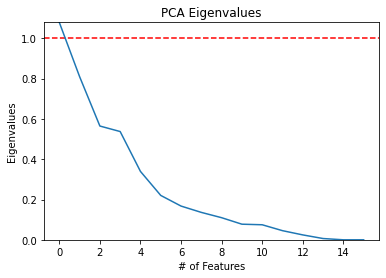

In [ ]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

maybe 8 or 10

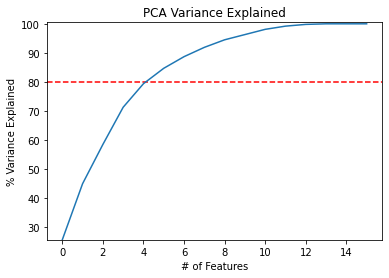

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

maybe 4

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 8)
covar_matrix.fit(PCA_df)

PCA(n_components=8)

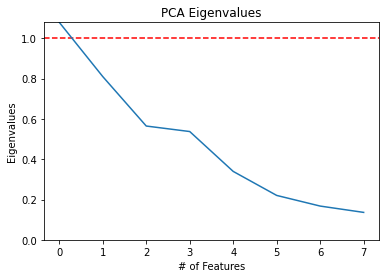

In [ ]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

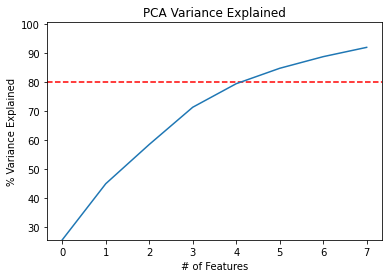

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

try 4

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 4)
covar_matrix.fit(PCA_df)

PCA(n_components=4)

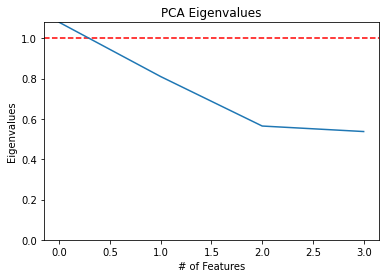

In [ ]:
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

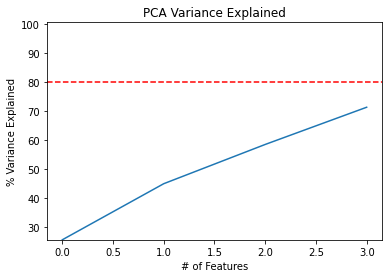

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var), 100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

#PCA PFAS continuous only

In [ ]:
#making one master dataframe of everything in PFAS_H
df_PFAS=pd.DataFrame(data=df['PFAS_H'])
df_PFAS.drop(columns = 'WTSB2YR')
#removing records where there are missing values in the PFAS file
df_PFAS.replace([np.inf, -np.inf], np.nan, inplace=True)
df_PFAS=df_PFAS.dropna()

In [ ]:
PCA_df=df_PFAS.dropna()
PCA_df=PCA_df.drop(columns='WTSB2YR')

In [ ]:
display(PCA_df)

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568.0,0.20,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.5,0.0,0.10,0.0,0.07,1.0
1,73571.0,0.30,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,1.3,0.0,0.07,1.0,0.07,1.0
2,73574.0,0.10,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.7,0.0,0.07,1.0,0.07,1.0
3,73576.0,0.20,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,0.6,0.0,0.07,1.0,0.10,0.0
4,73577.0,0.10,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.4,0.0,0.07,1.0,0.07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,83711.0,0.07,1.0,0.6,0.0,0.20,0.0,0.07,1.0,0.07,1.0,0.3,0.0,0.07,1.0,0.07,1.0
2334,83712.0,0.20,0.0,3.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.5,0.0,0.07,1.0,0.07,1.0
2335,83713.0,0.90,0.0,1.1,0.0,0.07,1.0,0.07,1.0,0.07,1.0,1.5,0.0,0.50,0.0,0.30,0.0
2336,83717.0,0.20,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.07,1.0,0.8,0.0,0.07,1.0,0.07,1.0


In [ ]:
# detect percentages dictionary : d_p_dropna 
#filtering column names with all 0 and 1 values
bin = PCA_df.columns[PCA_df.isin([0.0,1.0]).all()]
#print(bin)
#iterating over all columns we want to use for PCA
for col in PCA_df.columns:
  #looking to see if the column is continuous for not. here we decide it is continuous if the column is not binary, and also make sure not to change SEQN
  if (col not in bin) and (col != 'SEQN'):
    #taking natural log of continuous values
    PCA_df[col] = np.log(PCA_df[col])
  else:
    PCA_df=PCA_df.drop(columns=col)


In [ ]:
display(PCA_df)

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBXPFDO
0,-1.609438,1.098612,-1.609438,-2.65926,-2.659260,-0.693147,-2.302585,-2.659260
1,-1.203973,0.693147,-1.609438,-2.65926,-2.659260,0.262364,-2.659260,-2.659260
2,-2.302585,-1.609438,-2.659260,-2.65926,-2.659260,-0.356675,-2.659260,-2.659260
3,-1.609438,2.028148,-2.659260,-2.65926,-1.609438,-0.510826,-2.659260,-2.302585
4,-2.302585,0.182322,-2.659260,-2.65926,-2.659260,-0.916291,-2.659260,-2.659260
...,...,...,...,...,...,...,...,...
2333,-2.659260,-0.510826,-1.609438,-2.65926,-2.659260,-1.203973,-2.659260,-2.659260
2334,-1.609438,1.163151,-2.659260,-2.65926,-2.659260,-0.693147,-2.659260,-2.659260
2335,-0.105361,0.095310,-2.659260,-2.65926,-2.659260,0.405465,-0.693147,-1.203973
2336,-1.609438,0.336472,-2.659260,-2.65926,-2.659260,-0.223144,-2.659260,-2.659260


In [ ]:
# eigen decomposition on covariance matrix 
cov_mat = np.cov(PCA_df.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-5.59741259e-01 -3.36320592e-01 -7.29874599e-02 -4.14519842e-03
  -2.13695519e-01 -4.23164019e-02 -7.20784270e-01  3.53187361e-02]
 [-4.50431797e-01  7.39872298e-01  3.95730910e-01 -2.61600492e-03
   2.66729309e-01  1.19635753e-02 -1.19521111e-01 -8.67031436e-02]
 [-1.52873008e-01  3.72224670e-01 -9.11959803e-01  8.51548762e-05
   7.40873640e-02 -2.32157760e-02  1.72262331e-02  9.12665531e-03]
 [-2.86288031e-03  1.44948585e-03  3.67309466e-04  9.99812903e-01
  -2.87971310e-03  1.82521126e-02 -4.52420337e-03 -1.35172212e-03]
 [-4.36212098e-02  1.27036638e-02 -1.89362536e-02 -1.83003224e-02
  -9.04024899e-02  9.89225830e-01  3.71434116e-03  1.02411783e-01]
 [-4.75339530e-01  2.21018795e-02  5.70663897e-02  1.81522364e-03
  -5.91749162e-01 -1.09768982e-01  5.50775633e-01  3.23626129e-01]
 [-4.77840422e-01 -4.27803834e-01 -5.20197861e-02  7.08402553e-04
   5.01594003e-01  7.00654662e-02  4.03111019e-01 -4.08584928e-01]
 [-6.51200261e-02 -1.31370239e-01  8.82313673e-03  3.38

In [ ]:
scree_info=eig_vals/sum(eig_vals)
scree_info

array([0.47555107, 0.21562039, 0.15476379, 0.0013716 , 0.0523044 ,
       0.02406203, 0.03395391, 0.04237281])

In [ ]:
pca = PCA()
pca.fit_transform(PCA_df.drop(columns=['LBXPFDE']))
print(pca.explained_variance_ratio_)

[0.441292   0.22254878 0.18897515 0.06300878 0.05256579 0.02990588
 0.00170361]


In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = None)
covar_matrix.fit(PCA_df)

PCA()

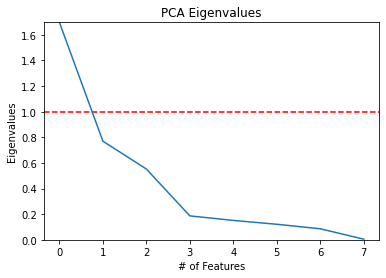

In [ ]:
import matplotlib.pyplot as plt 
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

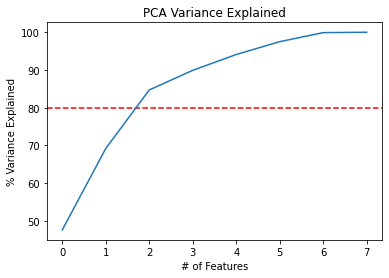

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
#plt.ylim(min(var), 100.1)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

after looking at elbow plots maybe 3

In [ ]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 3)
covar_matrix.fit(PCA_df)

PCA(n_components=3)

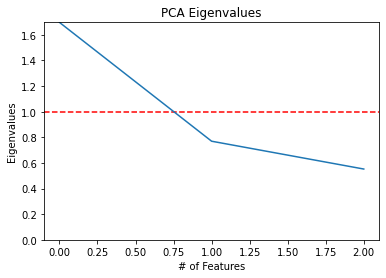

In [ ]:
import matplotlib.pyplot as plt 
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle = '--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

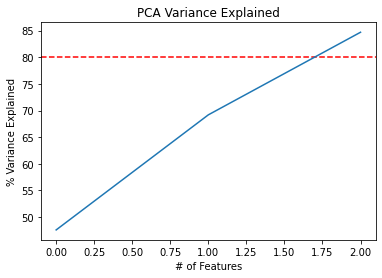

In [ ]:
variance = covar_matrix.explained_variance_ratio_ # calculate variance ratios
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
#plt.ylim(min(var), 100.1)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

3

In [ ]:
–